# Load Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms

%matplotlib inline

## Load Drive and Read File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv(r"/content/drive/MyDrive/CDAC DBDA Data File/Project Files/NIFTY_50__EQ__INDICES__NSE__MINUTE.csv")

In [4]:
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,8210.10,8211.70,8189.00,8189.55,0.0
1,2017-01-02 09:16:00+05:30,8188.75,8193.95,8188.75,8189.95,0.0
2,2017-01-02 09:17:00+05:30,8190.15,8190.75,8173.70,8173.70,0.0
3,2017-01-02 09:18:00+05:30,8173.35,8177.55,8169.15,8177.55,0.0
4,2017-01-02 09:19:00+05:30,8177.85,8178.15,8173.45,8174.40,0.0


##PreProcessing

In [5]:
#Editing TimeStamp
df["timestamp"] = df["timestamp"].apply(lambda x: x.replace("+05:30",""))

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370740 entries, 2017-01-02 09:15:00 to 2021-01-01 15:29:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    370677 non-null  float64
 1   high    370677 non-null  float64
 2   low     370677 non-null  float64
 3   close   370677 non-null  float64
 4   volume  370677 non-null  float64
dtypes: float64(5)
memory usage: 17.0 MB


In [7]:
df.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02 09:15:00,8210.10,8211.70,8189.00,8189.55,0.0
2017-01-02 09:16:00,8188.75,8193.95,8188.75,8189.95,0.0
2017-01-02 09:17:00,8190.15,8190.75,8173.70,8173.70,0.0
2017-01-02 09:18:00,8173.35,8177.55,8169.15,8177.55,0.0
2017-01-02 09:19:00,8177.85,8178.15,8173.45,8174.40,0.0


**Create DataFrame**

In [8]:
df_arima=pd.DataFrame(df['close'])
df_arima

,close
timestamp,
2017-01-02 09:15:00,8189.55
2017-01-02 09:16:00,8189.95
2017-01-02 09:17:00,8173.70
2017-01-02 09:18:00,8177.55
2017-01-02 09:19:00,8174.40
...,...
2021-01-01 15:25:00,14019.00
2021-01-01 15:26:00,14019.10
2021-01-01 15:27:00,14018.15


**Select 50000 rows**

In [9]:
df_arima=df_arima.iloc[-50001:-1,].copy()

In [10]:
df_arima

,close
timestamp,
2020-06-24 14:24:00,10410.25
2020-06-24 14:25:00,10416.45
2020-06-24 14:26:00,10408.75
2020-06-24 14:27:00,10404.50
2020-06-24 14:28:00,10407.30
...,...
2021-01-01 15:24:00,14022.70
2021-01-01 15:25:00,14019.00
2021-01-01 15:26:00,14019.10


In [11]:
df_arima.isnull().sum()

close    3
dtype: int64

In [12]:
df_arima.fillna(method='ffill',inplace=True)

In [13]:
df_arima.isnull().sum()
df_arima.isna().sum()

close    0
dtype: int64

## Check for Data is stationary or not using Dickey Fuller Test using Statsmodel library

In [14]:
from statsmodels.tsa.stattools import adfuller
#H0 Data is not stationary
#H1 Data is Stationary

In [15]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [16]:
adf_test(df_arima['close'])

ADF Statistics: 0.24132601305339846
p- value: 0.9744864911770148
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [17]:
adf,pvalue,usedlag,nobs,cvalue,icbest = adfuller(df_arima['close'])
print("adf=",adf," pvalue=",pvalue,"nobs=",nobs,"cvalue=",cvalue,"icbest=",icbest)

adf= 0.24132601305339846  pvalue= 0.9744864911770148 nobs= 49968 cvalue= {'1%': -3.430480876480283, '5%': -2.8615978447156234, '10%': -2.56680078882917} icbest= 322393.1908765625


In [18]:
#Data is not stationary so use diffrencing

In [19]:
## Use Techniques Differencing
df_arima['close first Diffrencing']=df_arima['close']-(df_arima['close'].shift(1))

In [20]:
df_arima

,close,close first Diffrencing
timestamp,,
2020-06-24 14:24:00,10410.25,NaN
2020-06-24 14:25:00,10416.45,6.20
2020-06-24 14:26:00,10408.75,-7.70
2020-06-24 14:27:00,10404.50,-4.25
2020-06-24 14:28:00,10407.30,2.80
...,...,...
2021-01-01 15:24:00,14022.70,4.50
2021-01-01 15:25:00,14019.00,-3.70
2021-01-01 15:26:00,14019.10,0.10


In [21]:
df.asfreq("B")['close']

timestamp
2017-01-02 09:15:00     8189.55
2017-01-03 09:15:00     8173.45
2017-01-04 09:15:00     8201.40
2017-01-05 09:15:00     8229.35
2017-01-06 09:15:00     8290.95
                         ...   
2020-12-28 09:15:00    13844.10
2020-12-29 09:15:00    13941.35
2020-12-30 09:15:00    13950.30
2020-12-31 09:15:00    13953.25
2021-01-01 09:15:00    14013.15
Freq: B, Name: close, Length: 1045, dtype: float64

In [22]:
#Drop Na after first diffrencing

In [23]:
df_arima.isnull().sum()

close                      0
close first Diffrencing    1
dtype: int64

In [24]:
df_arima.dropna(inplace=True)

In [25]:
adf_test(df_arima['close first Diffrencing'])

ADF Statistics: -40.33358230340236
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [26]:
#pValue is 0 < 0.05 thus Data is stationary

##ACF and PACF graphs

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

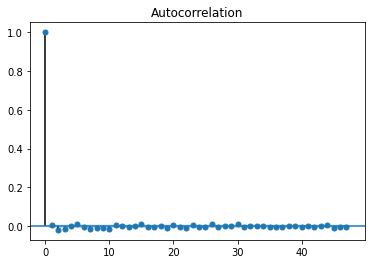

In [28]:
acf = plot_acf(df_arima["close first Diffrencing"].dropna())

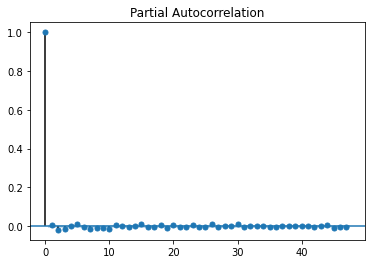

In [29]:
pacf_second = plot_pacf(df_arima["close first Diffrencing"].dropna())

In [30]:
df_arima.index.min()

Timestamp('2020-06-24 14:25:00')

In [31]:
df_arima.index.max()

Timestamp('2021-01-01 15:28:00')

In [ ]:
#374 min from 9:15 am to 3:29 pm
#374 of 1 day 
#374 * 22
#8228 rows for 1 month 
# we have 6 momths data


In [32]:
df_arima.asfreq('B').shape

(138, 2)

# Auto Arima

In [34]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 7.7 MB/s 
     |████████████████████████████████| 9.8 MB 38.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [36]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_arima['close'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=322819.614, Time=30.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=322851.832, Time=1.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=322852.714, Time=1.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=322852.671, Time=3.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=322856.773, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=322831.781, Time=9.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=322832.473, Time=8.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=322823.874, Time=40.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=322821.736, Time=66.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=322842.463, Time=36.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=322829.655, Time=13.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=322829.045, Time=5.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=322823.330, Time=70.66 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=322824.841, Time=19.19 se

In [37]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [38]:
modelARIMA=ARIMA(df.asfreq("B")['close'],order=(2,1,2))

In [39]:
modelArima_fit=modelARIMA.fit()

In [40]:
modelArima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1045
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6151.763
Date:                Tue, 27 Sep 2022   AIC                          12313.525
Time:                        07:00:19   BIC                          12338.279
Sample:                    01-02-2017   HQIC                         12322.914
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9114      0.064     14.259      0.000       0.786       1.037
ar.L2         -0.5999      0.084     -7.166      0.000      -0.764      -0.436
ma.L1         -1.0158      0.060    -16.847      0.000      -1.134      -0.898
ma.L2          0.7406      0.069     10.738      0.000       0.605       0.876
sigma2      1.484e+04    239.229     62.015      0.000    1.44e+04    1.53e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             17162.25
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               6.41   Skew:                            -1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
print(df.asfreq('B').shape)
train=df.asfreq('B')['close'].iloc[0:835,]
test=df.asfreq('B')['close'].iloc[835:]
print(train.shape,test.shape)
#80 20 split

(1045, 5)
(835,) (210,)


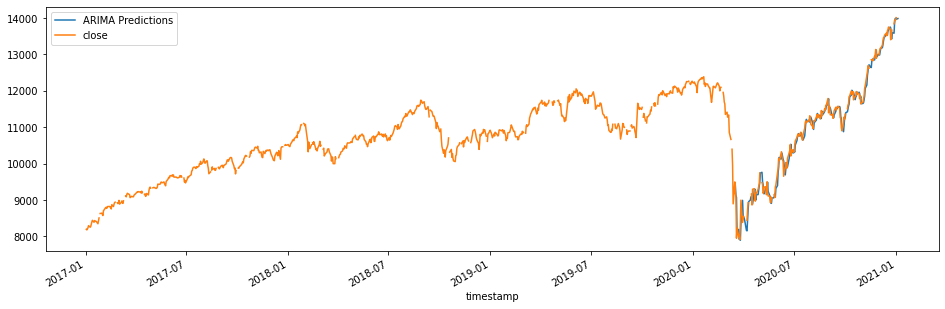

In [42]:
pred=modelArima_fit.predict(start=836,end=1045,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
df.asfreq('B')['close'].plot(legend=True,figsize=(16,5))

In [43]:
Y_pred = modelArima_fit.predict(start=836,end=1045,typ='levels')
Y_pred

2020-03-17 09:15:00     9379.858611
2020-03-18 09:15:00     9122.250667
2020-03-19 09:15:00     9067.572080
2020-03-20 09:15:00     8083.966810
2020-03-23 09:15:00     8189.086126
                           ...     
2020-12-29 09:15:00    13858.037349
2020-12-30 09:15:00    13985.353853
2020-12-31 09:15:00    13996.810105
2021-01-01 09:15:00    13968.894097
2021-01-04 09:15:00    13988.898629
Freq: B, Name: predicted_mean, Length: 210, dtype: float64

In [44]:
from sklearn.metrics import r2_score

In [45]:
def eval_fun(Y_test,Y_pred):
    from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
    r2 = r2_score(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    mae = mean_absolute_error(Y_test,Y_pred)
    return r2, mse, mae

In [46]:
test.isnull().sum()

10

In [47]:
test.ffill(inplace=True)

In [48]:
r2,mse,mae= eval_fun(test,Y_pred)
print("r2 score = ", r2, "mse = ", mse, " mae =", mae)

r2 score =  0.9995294937305317 mse =  1108.9633222276034  mae = 23.446660090081817
